# Introduction


The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. The goal here is to build a predictive model that answers the question: “what sorts of people were more likely to survive?” by using passenger data (ie name, age, gender, socio-economic class, etc).

# Data Acquisition

The data used for this project is gotten from Kaggle. It can be accessed from the link https://www.dropbox.com/sh/uaolfsybe2le8ox/AACDlEOTiB3Yk5AMwzXF64qLa?dl=0

The data into two - testing and training. 

In [1]:
# import pandas library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#import the testing and training data and assign them to variables
#url_testing_data = "https://www.dropbox.com/s/9z8zlj6zmj99nb1/test.csv?dl=0"
testing_data = pd.read_csv("C://Users/ilech/Downloads/titanic/test.csv")

#url_training_data = "https://www.dropbox.com/s/rzzs4of9zhd30wy/train.csv?dl=0"
training_data = pd.read_csv("C://Users/ilech/Downloads/titanic/train.csv")
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
testing_data = pd.read_csv("C://Users/ilech/Downloads/titanic/test.csv")
testing_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
# The dataframe.shape() and .describe() can be used to get an overall understanding and description of the tables of interest.
# .shape() shows the number of rows and columns respectively
training_data.shape

(891, 12)

In [4]:
# .describe() gives an overall description of the table
training_data.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Thomas, Master. Assad Alexander",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
print(training_data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


# Data Cleaning/Wrangling

The .describe() tabel shows a total of 891 passengers. Two columns have missing values - Age and Cabin. Age has 714 values thus indicating 177 missing values while Cabin has 687 missing values. Embarked has 2 missing values. We can verify this easily with the .isnull() function.

In [6]:
#check for columns with missing data
training_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we can see, there are 177 Missing values in Age column 687 missing values in Cabin column. We have to deal with these missing values in order to build a good machine learning model.

### Data Cleaning: Dealing with Missing Values
To deal with the Age column, the missing values with be replaced with random numbers ranging around the mean. The range is calcuted using the standard deviation.

In [7]:
#calculate the mean and standard deviation and assign it to a variable
mean = training_data["Age"].mean()
std = training_data["Age"].std()

#generate an array of random numbers ranging from mean-std to mean+std and assign it to a variable
random_age = np.random.randint(mean-std, mean+std, size = 177)
age_slice = training_data["Age"].copy()

#replace the missing values with the random numbers generated
age_slice[np.isnan(age_slice)] = random_age
training_data["Age"] = age_slice

#confirm that there are no missing values in Age
training_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Data Cleaning: Dropping Unnecessary Columns

Some columns simply cannot be analysed and should be dropped immediately for simplicity. Columns to be dropped are "PassengerId", "Ticket", "Cabin", "Name"

"PassengerId", "Ticket", "Name" are all unique vaariables and as such cannot be analysed. "Cabin" can be analysed when the deck is extracted from it but since only 1st class passengers have cabins, the rest are 'Unknown'. Given that 687 values from "Cabin" are missing, the whole column will be removed

In [8]:
#assign the columns to be dropped to a variable
droped_columns = ["PassengerId", "Ticket", "Cabin", "Name"]
#pass the variable into the .drop function
training_data.drop(droped_columns, axis=1, inplace=True)

#verify that the columns have been dropped
training_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,17.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [9]:
training_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
# Filling 2 missing values with most frequent value
training_data["Embarked"] = training_data["Embarked"].fillna('S')

### Data Cleaning: Convert Categorical Data to Dummy Variable

Categorical data needs to be converted to numeric values so they can be used for regression analysis in the later on. In this case, the "Sex" and "Embarked" are the categorical variables assigned dummy variables.

In [11]:
# create a dummy variable for Sex and Embarked using .get_dummies function
sex_dummy = pd.get_dummies(training_data["Sex"])

embarked_dummy = pd.get_dummies(training_data["Embarked"])

#For clarity, change column names in Embarked
embarked_dummy.rename(columns={'C':'Cherbourg', 'Q':'Queenstown', 'S':'Southampton'}, inplace=True)
embarked_dummy.head()

,Cherbourg,Queenstown,Southampton
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [12]:
# merge dataframe "embarked_dummy" and "training_data" 
training_data = pd.concat([training_data, embarked_dummy, sex_dummy], axis=1)

#drop original column "Sex" and "Embarked" from "training_data"
#training_data.drop(columns=["Sex", "Embarked"], inplace=True)
#training_data.head()

# Feature Engineering

New features can be created as a linear combinations of features. One thing to consider is the size of a person’s family which is the sum of their ‘SibSp’ and ‘Parch’ attributes. Did people traveling alone have a better chance of survival? Or perhaps travelling with a family gave a higher chance? We'll examine both.

In [13]:
#Creating new family_size column
training_data['Family_Size'] = training_data['SibSp'] + training_data['Parch']
training_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cherbourg,Queenstown,Southampton,female,male,Family_Size
0,0,3,male,22.0,1,0,7.2500,S,0,0,1,0,1,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,0,1,0,1
2,1,3,female,26.0,0,0,7.9250,S,0,0,1,1,0,0
3,1,1,female,35.0,1,0,53.1000,S,0,0,1,1,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,0,1,0,1,0
5,0,3,male,17.0,0,0,8.4583,Q,0,1,0,0,1,0
6,0,1,male,54.0,0,0,51.8625,S,0,0,1,0,1,0
7,0,3,male,2.0,3,1,21.0750,S,0,0,1,0,1,4
8,1,3,female,27.0,0,2,11.1333,S,0,0,1,1,0,2
9,1,2,female,14.0,1,0,30.0708,C,1,0,0,1,0,1


# Exploratory Data Analysis

We can begin by calculating the correlation between variables of type "int64" or "float64" using the method .corr()

In [14]:
training_data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cherbourg,Queenstown,Southampton,female,male,Family_Size
Survived,1.000000,-0.338481,-0.072801,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.149683,0.543351,-0.543351,0.016639
Pclass,-0.338481,1.000000,-0.320508,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.074053,-0.131900,0.131900,0.065997
Age,-0.072801,-0.320508,1.000000,-0.229328,-0.172916,0.086453,0.033410,-0.020330,-0.016475,-0.083011,0.083011,-0.243124
SibSp,-0.035322,0.083081,-0.229328,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.068734,0.114631,-0.114631,0.890712
Parch,0.081629,0.018443,-0.172916,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.060814,0.245489,-0.245489,0.783111
Fare,0.257307,-0.549500,0.086453,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.162184,0.182333,-0.182333,0.217138
Cherbourg,0.168240,-0.243292,0.033410,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.782742,0.082853,-0.082853,-0.046215
Queenstown,0.003650,0.221009,-0.020330,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.499421,0.074115,-0.074115,-0.058592
Southampton,-0.149683,0.074053,-0.016475,0.068734,0.060814,-0.162184,-0.782742,-0.499421,1.000000,-0.119224,0.119224,0.077359
female,0.543351,-0.131900,-0.083011,0.114631,0.245489,0.182333,0.082853,0.074115,-0.119224,1.000000,-1.000000,0.200988


Next, we visualise the correlation between each variable and the target variable - "Survived"

## 1. Age

C:\Users\ilech\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ilech\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


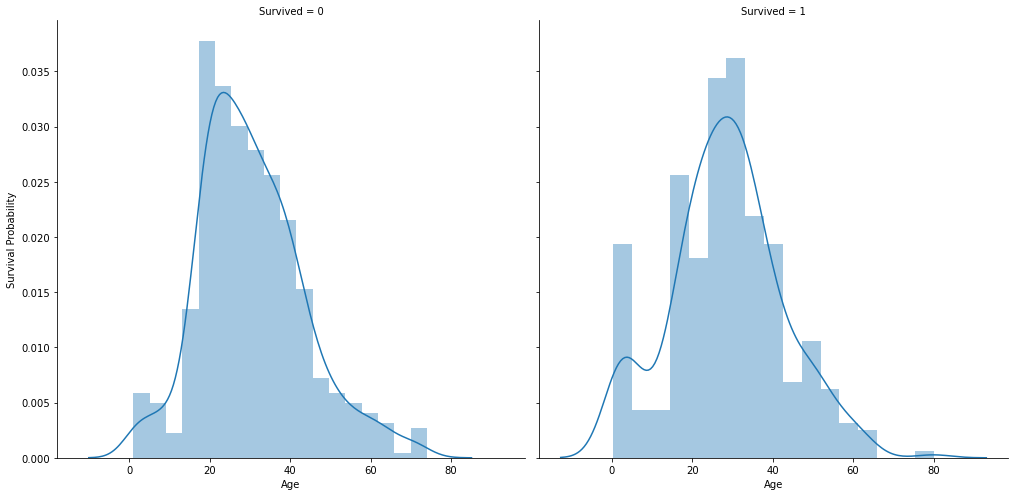

In [15]:
ageplot = sns.FacetGrid(training_data, col="Survived", height = 7)
ageplot = ageplot.map(sns.distplot, "Age")
ageplot = ageplot.set_ylabels("Survival Probability")

Conclusions drawn from this graphs alone are inconclusive. The age range of people with a high chance of survival range between 18-40 after which the chances of survival decreases as age increases. However, the same can be said for those who did not survive. The age range of people with a high chance of not surviving range between 18-40 after which the chances of dying decreases as age increases. 

To get a better understanding, a combination of the age and sex of survival may reveal more insights.

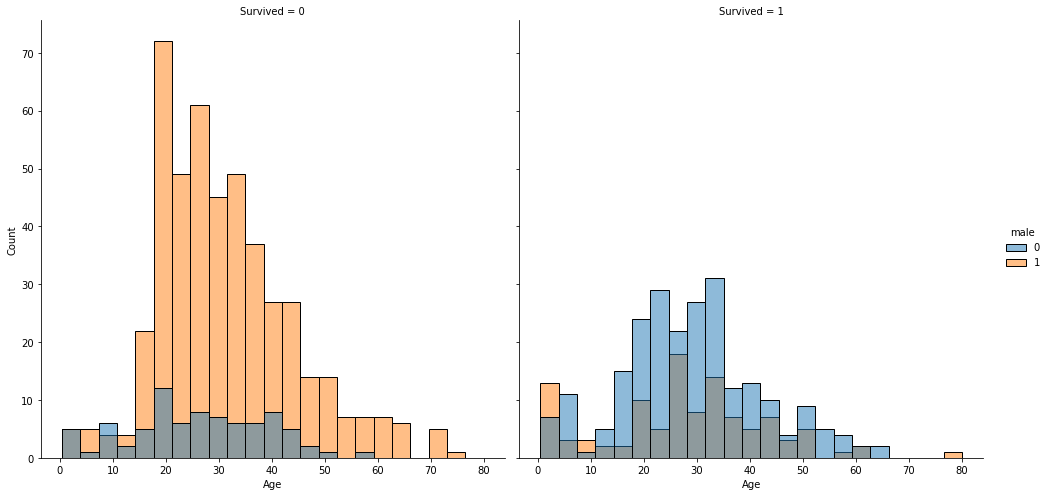

In [16]:
sns.displot(data=training_data, x="Age", hue="male", col="Survived", kind="hist", height = 7)

From the graph, it is clear that while the chances of surviving and dying are fairly similar across age range, the key difference is the sex composition of each. Those who did not survive comprised mostly of men while those who survived comprised mostly of women. This is true across all ages except little children.

## 2. SibSp (Number of Sibilings), Parch (Parents or children) and Family Size

First, we visualize SibSp variable against the target variable - Survived. Then we look at Parch variable and family size (which is a combination of both SibSp and Parch) to see if any significant insight pops out

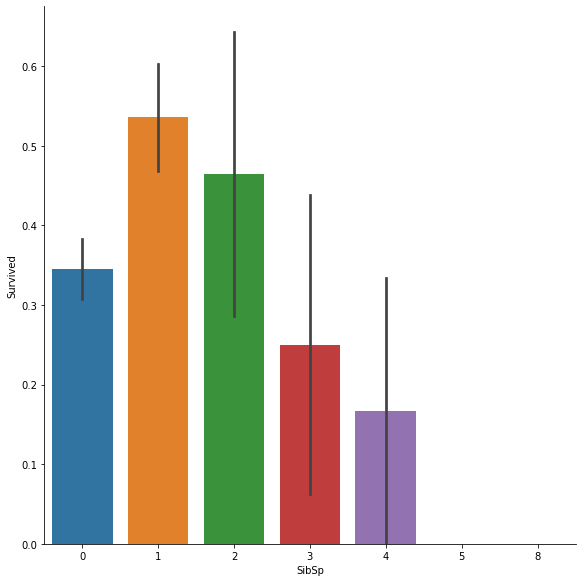

In [17]:
bargraph_sibsp = sns.catplot(x = "SibSp", y = "Survived", data = training_data, kind="bar", height = 8)

We can see that individuals with 1 or 2 sibilings have a good chance of survival.

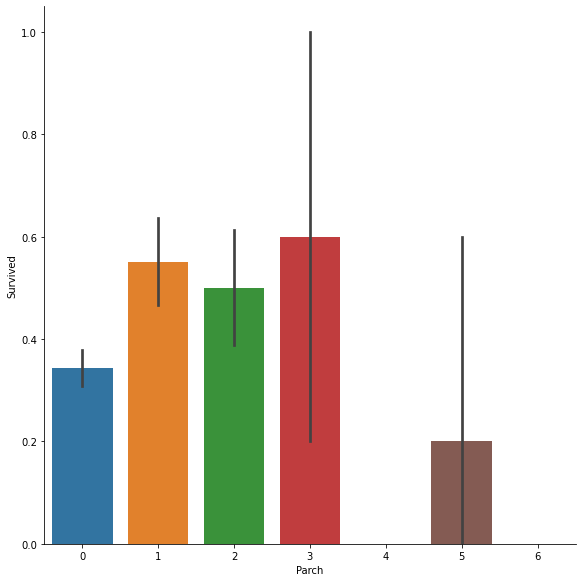

In [18]:
bargraph_Parch = sns.catplot(x = "Parch", y = "Survived", data = training_data, kind="bar", height = 8)

We can see that individuals with 1-3 family members had a significant advantage over those with 0,4 or 5 family members.

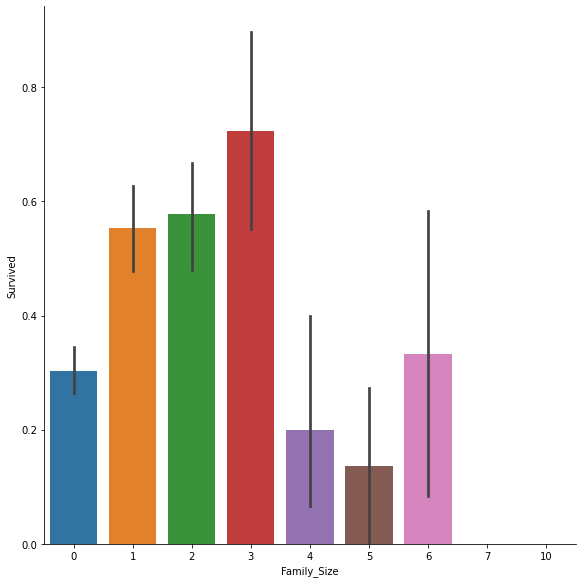

In [19]:
bargraph_Family_Size = sns.catplot(x = "Family_Size", y = "Survived", data = training_data, kind="bar", height = 8)

The graph depicting the survival rate for each family size is fairly consistent with the previous graphs. Indivduals with 1-3 family members have significant advantage over those with higher or less family members.

## 3. Sex

Having examined sex along with age, it is still important to examine the influence of sex and the chances of survival alone

In [20]:
women = training_data.loc[training_data.female == 1]["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [21]:
men = training_data.loc[training_data.male == 1]["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


While ~78% of women survived the titanice, only ~18% of men did. This shows the overwhelming influence that sex played in surviving the titanic

## 4. Pclass

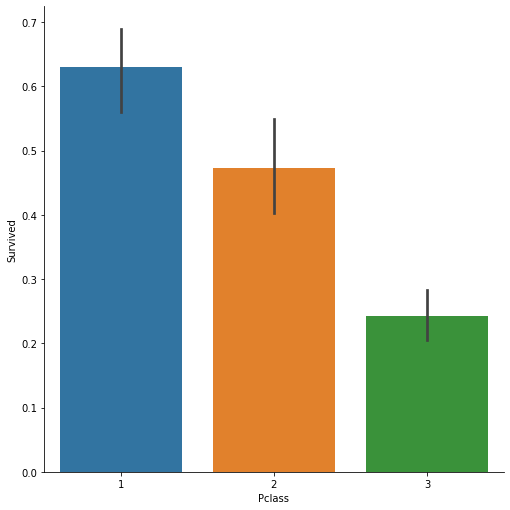

In [22]:
pclassplot = sns.catplot(x = "Pclass", y="Survived", data = training_data, kind="bar", height = 7)

This shows that higher class had a higher chance of survival

## PClass v Sex

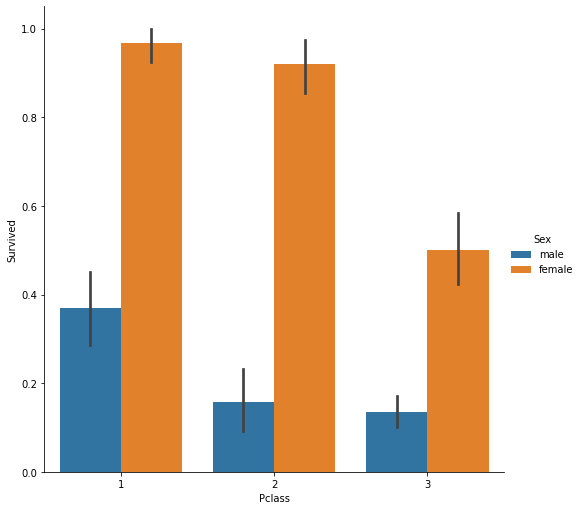

In [23]:
a = sns.catplot(x = "Pclass", y="Survived", hue="Sex", data=training_data, height = 7, kind="bar")

This shows that depsite class differences, women in lower classes had higher chances of surviving than men in higher classes. This shows just how important sex was in surviving the titanic

## 5. Embarked

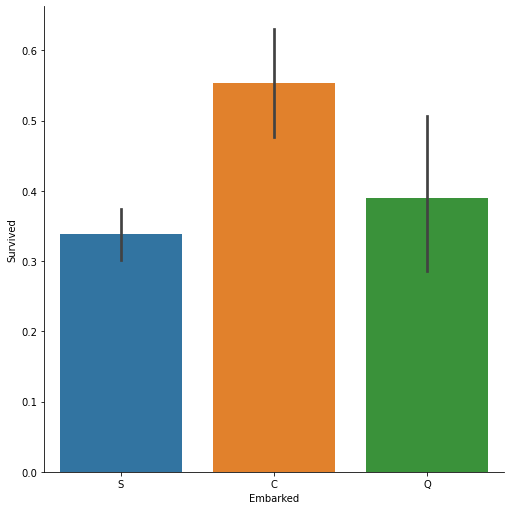

In [24]:
sns.catplot(x="Embarked", y="Survived", data=training_data, height = 7, kind="bar")

## Embarked v PClass

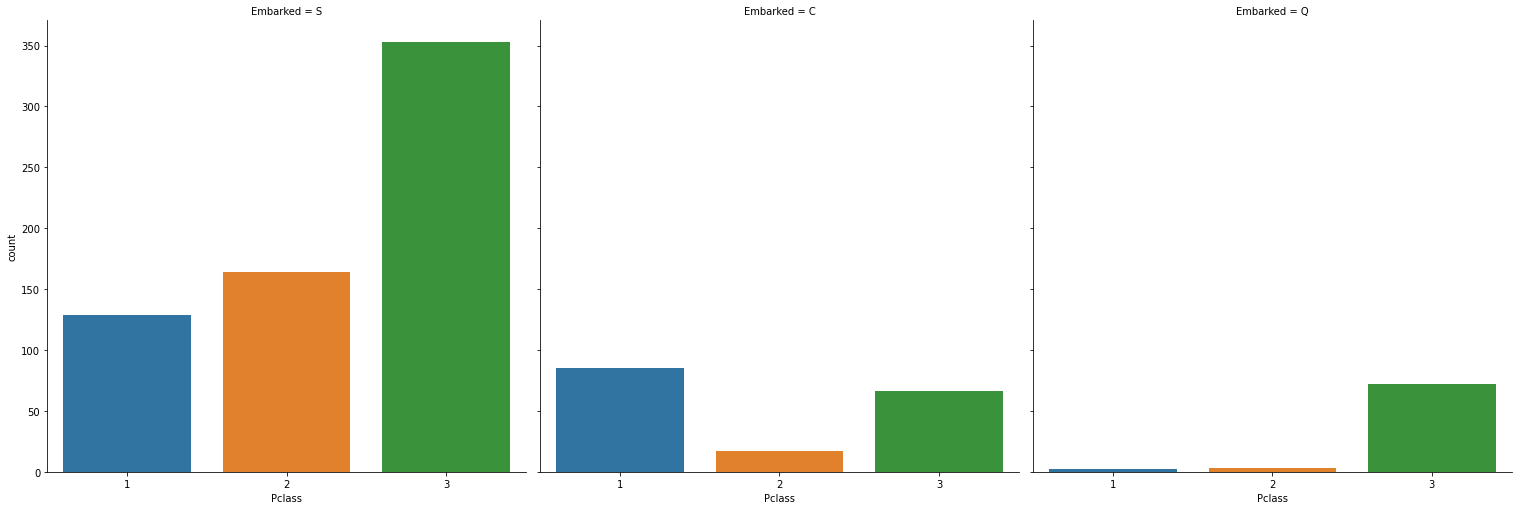

In [25]:
sns.catplot(x="Pclass", col="Embarked", data = training_data, kind="count", height=7)

Passengers embarked from C station, majority of them was from 1st class. That's why we got survival probability of C embarked passengers higher.

# The Machine Learning Model

In [26]:
# establish the independent variable
train_x = training_data[['Pclass', 'male', 'female', 'Age', 'SibSp', 'Parch', 'Family_Size', 'Cherbourg', 'Queenstown', 'Southampton']]

# establish the dependent variable
train_y = training_data[['Survived']]

#split the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.20, random_state=42)

### 1. Random Forest Classifier 

In [27]:
clf1 = RandomForestClassifier()
clf1.fit(x_train, y_train)
rfc_y_pred = clf1.predict(x_test)
rfc_accuracy = accuracy_score(y_test,rfc_y_pred) * 100
print("accuracy=",rfc_accuracy)

accuracy= 80.44692737430168


<ipython-input-27-6a6be2d08e9a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf1.fit(x_train, y_train)


### 2. Logistic Regression

In [28]:
clf2 = LogisticRegression()
clf2.fit(x_train, y_train)
lr_y_pred = clf2.predict(x_test)
lr_accuracy = accuracy_score(y_test,lr_y_pred)*100

print("accuracy=",lr_accuracy)

accuracy= 81.00558659217877


C:\Users\ilech\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ilech\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 3. K-Neighbor Classifier

In [29]:
clf3 = KNeighborsClassifier(5)
clf3.fit(x_train, y_train)
knc_y_pred = clf3.predict(x_test)
knc_accuracy = accuracy_score(y_test,knc_y_pred)*100

print("accuracy=",knc_accuracy)

accuracy= 78.2122905027933


<ipython-input-29-cc788320323f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf3.fit(x_train, y_train)


Since we're getting maximum accuracy score with Logistics Regression, we choose it for making predictions on test.csv.

In [30]:
testing_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [31]:
#calculate the mean and standard deviation and assign it to a variable
mean_test = testing_data["Age"].mean()
std_test = testing_data["Age"].std()

#generate an array of random numbers ranging from mean-std to mean+std and assign it to a variable
random_age_test = np.random.randint(mean_test-std, mean_test+std, size = 86)
age_slice_test = testing_data["Age"].copy()

#replace the missing values with the random numbers generated
age_slice_test[np.isnan(age_slice_test)] = random_age_test
testing_data["Age"] = age_slice_test

#confirm that there are no missing values in Age
testing_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [32]:
# Replacing missing value of Fare column
testing_data['Fare'].fillna(testing_data['Fare'].mean(), inplace=True)

testing_data.isnull().sum()

# create a dummy variable for Sex and Embarked using .get_dummies function
sex_dummy = pd.get_dummies(testing_data["Sex"])

embarked_dummy = pd.get_dummies(testing_data["Embarked"])

#For clarity, change column names in Embarked
embarked_dummy.rename(columns={'C':'Cherbourg', 'Q':'Queenstown', 'S':'Southampton'}, inplace=True)
embarked_dummy.head()

,Cherbourg,Queenstown,Southampton
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [33]:
# merge dataframe "embarked_dummy" and "testing_data" 
testing_data = pd.concat([testing_data, embarked_dummy, sex_dummy], axis=1)

In [34]:
col_to_drop = ["PassengerId", "Ticket", "Cabin", "Name", "Sex", "Embarked"]
testing_data.drop(col_to_drop, axis=1, inplace=True)
testing_data.head(10)

,Pclass,Age,SibSp,Parch,Fare,Cherbourg,Queenstown,Southampton,female,male
0,3,34.5,0,0,7.8292,0,1,0,0,1
1,3,47.0,1,0,7.0000,0,0,1,1,0
2,2,62.0,0,0,9.6875,0,1,0,0,1
3,3,27.0,0,0,8.6625,0,0,1,0,1
4,3,22.0,1,1,12.2875,0,0,1,1,0
5,3,14.0,0,0,9.2250,0,0,1,0,1
6,3,30.0,0,0,7.6292,0,1,0,1,0
7,2,26.0,1,1,29.0000,0,0,1,0,1
8,3,18.0,0,0,7.2292,1,0,0,1,0
9,3,21.0,2,0,24.1500,0,0,1,0,1


In [35]:
x_test = testing_data
y_pred = clf1.predict(x_test)
originaltest_data = pd.read_csv("C://Users/ilech/Downloads/titanic/test.csv")
submission = pd.DataFrame({
        "PassengerId": originaltest_data["PassengerId"],
        "Survived": y_pred
    })
submission.head(20)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,1
8,900,0
9,901,0
